In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

class Agent():
    '''
        This is the class of agents. Every agent will be an instance
        of this class. Each Agent has its genes and tree number where he goes for food.
    '''
    def __init__(self,g1='X',g2='Y',g3='Z',id=None):
        '''
            Initialize properties of agent
        '''
        self.id = id
        self.pos={'x':0,'y':0}
        self.treeno = -1
        self.g1 = g1         #gene for altruism
        self.g2 = g2         #green beard
        self.g3 = g3         #pranksters

class Environment():
    '''
        This class is for the environment.
        In a day, our agents will be spawned at random tree. the goal for an agent is to aquire
        food as it could and if he see a demon then on the basis of his altruistic behaviour and
        prankster behaviour he make a call or not. At night, we count the remaining agents and 
        allow them to reproduce. their population becomes twice at night(according to their genes)
    '''
    def __init__(self,no_of_trees=100,demons=20):
        '''
            Initializes environment
            no_of_trees : Total no of trees in our environment
            demon : Number of demon in the environment
            range : An agent can pick up food in it's range neighbourhood. i.e.
                    if food is available in (x-range,x+range)x(y-range,y+range)
                    where it's current position is x,y.
        '''
        self.no_of_trees = no_of_trees  #total no. of tree
        self.df={}    # dictionary to store current number of agents to make graph
        for i in range(8):
            self.df[i]=[]
        self.demons = demons    #demons
        self.pop_hist = []      #history of removal (useless for our code)
        self.agents = []        #agents declaration
        self.arr_of_demons=[]      #array of demons
        self.arr_of_trees=[]       #array of trees
        self.curr_total_lived=0
        
    def setup(self, agents : list):
        '''
            Sets environment's agents to `agents`
            agents : List of Agents initialized using `Agent` class
        '''
        self.agents=agents
        self.curr_total_lived=len(agents)
        for i in range(len(agents)):
            agents[i].id=i
        return    
    
    
    def __populateTree(self):
        '''
            Private Method. Spawns trees randomly and demons. 
        '''
        self.arr_of_trees=np.arange(self.no_of_trees)  #we are not alloting trees on the basis of their locations we are just having some demons among all trees and anyone can choose any tree
        self.arr_of_demons = random.sample(range(0, self.no_of_trees-1), self.demons)  
        return

    
    def __pickFood(self):
        '''
            Private Method. Agents Picks food.


            trees are alloted randomly to the agents.
        '''

        for agent in self.agents:
            agent.treeno=random.randint(0,self.no_of_trees-1)  #it will randomly choose trees of every agent
            





    def __night(self):
        '''
            Private Method. 
            kills all those agents who can't procured food. and also remove those who were killed by demon.
            and also allow to reproduce
        '''
        to_delete = []
        d={}
        for i in range(len(self.agents)):
            agent = self.agents[i]
            d[agent.treeno]=[]
        for i in range(len(self.agents)):
            agent = self.agents[i]
            d[agent.treeno].append(i)
        for i in d:
            x=random.randint(0,len(d[i])-1)
            choices=[]
            if i not in self.arr_of_demons and agents[d[i][x]].g1=='X' and agents[d[i][x]].g3=='Z':
                choices = ['fake']*30+['no_call_nd']*70
            elif i not in self.arr_of_demons and agents[d[i][x]].g1=='X1' and agents[d[i][x]].g3=='Z':
                choices = ['fake']*100
            elif i not in self.arr_of_demons:
                choices=['no_call_nd']
            elif(agents[d[i][x]].g1=='X' and agents[d[i][x]].g3=='Z'):
                choices = ['real']*70+['fake']*30
            elif(agents[d[i][x]].g1=='X' and agents[d[i][x]].g3=='Z1'):
                choices = ['real']
            elif(agents[d[i][x]].g1=='X1' and agents[d[i][x]].g3=='Z'):
                choices = ['fake']*100
            elif(agents[d[i][x]].g1=='X1' and agents[d[i][x]].g3=='Z1'):
                choices = ['fake']
            decision = np.random.choice(choices)
            choices3=[]
            if decision=='real':
                choices3=['sur']*50+['dead']*50
            else:
                choices3=['sur']
            decision3 = np.random.choice(choices3)
            caller=d[i][x]
            if (agents[d[i][x]].g2=='Y'):
                if(decision=='real'):
                    d[i].clear()
                    if decision3=='dead':
                        d[i].append(caller)
                else:
                    if decision3=='sur':
                        d[i].remove(d[i][x])
            else:
                choices2 = ['T']*50+['NT']*50
                decision2 = np.random.choice(choices2)
                if(decision=='real' and decision2=='T'):
                    d[i].clear()
                    if decision3=='dead':
                        d[i].append(caller)
                elif(decision=='real' and decision2=='NT'):
                    if decision3=='sur':
                        d[i].remove(d[i][x])
                elif(decision=='fake' and decision2=='NT'):
                    d[i].clear()
                else:
                    if decision3=='sur':
                        d[i].remove(d[i][x])
                
            to_delete.extend(d[i])
            
            

        # Kill everyonw who didn't got food
        for i in sorted(to_delete,reverse=True):
            self.agents.pop(i)
        
        #reproduce
        l=len(self.agents)
        k1=0
        for agent in self.agents:
            k1=k1+1
            self.agents.append(Agent(agent.g1,agent.g2,agent.g3))
            if(k1>=l):
                break

        return


    def __resetFood(self):
        '''
            Private Method. reset Agent's food numbers
        '''
        for agent in self.agents:
            agent.treeno=-1
    
    
    def iterate(self):
        '''
            Runs a single Iteration. Calls Internal methods in a 
            logical sequence. 
        '''
        self.__populateTree()
        self.__pickFood()
        self.__night()
        self.__resetFood()
    def run(self, num_iterate):
        '''
            Runs the simulation for `num_iterate` iterations. 
        '''
        for i in range(num_iterate):
            self.iterate()
            self.pop_hist.append(self.getPopNumber())
        return self.df
        
            
            
            
    def getPopNumber(self):
        '''
            counting of current population
        '''
        arr=np.zeros(8)
        for i in self.agents:
            if(i.g1=='X' and i.g2=='Y' and i.g3=='Z'):
                arr[0]=arr[0]+1
            elif(i.g1=='X' and i.g2=='Y' and i.g3=='Z1'):
                arr[1]=arr[1]+1
            elif(i.g1=='X' and i.g2=='Y1' and i.g3=='Z'):
                arr[2]=arr[2]+1
            elif(i.g1=='X' and i.g2=='Y1' and i.g3=='Z1'):
                arr[3]=arr[3]+1
            elif(i.g1=='X1' and i.g2=='Y' and i.g3=='Z'):
                arr[4]=arr[4]+1
            elif(i.g1=='X1' and i.g2=='Y' and i.g3=='Z1'):
                arr[5]=arr[5]+1
            elif(i.g1=='X1' and i.g2=='Y1' and i.g3=='Z'):
                arr[6]=arr[6]+1
            elif(i.g1=='X1' and i.g2=='Y1' and i.g3=='Z1'):
                arr[7]=arr[7]+1
        z=0
        #print(arr)
        for i in arr:
            self.df[z].append(i)
            z=z+1
        #print(arr)
        return len(self.agents)

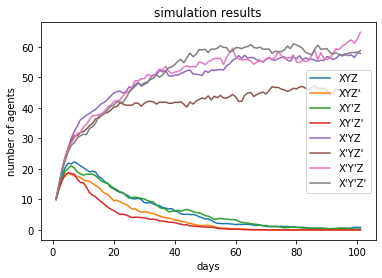

In [ ]:
ans={}
for i in range(8):
    ans[i]=[]
    for j in range(101):
        ans[i].append(0)
for i in range(100):
    e = Environment()
    agents=[]
    for i in range(10):
        agents.append(Agent('X','Y','Z'))
    for i in range(10):
        agents.append(Agent('X','Y','Z1'))
    for i in range(10):
        agents.append(Agent('X','Y1','Z'))
    for i in range(10):
        agents.append(Agent('X','Y1','Z1'))
    for i in range(10):
        agents.append(Agent('X1','Y','Z'))
    for i in range(10):
        agents.append(Agent('X1','Y','Z1'))
    for i in range(10):
        agents.append(Agent('X1','Y1','Z'))
    for i in range(10):
        agents.append(Agent('X1','Y1','Z1'))
    e.setup(agents)
    e.getPopNumber()
    dic=e.run(100)
    for i in dic:
        k=0
        for j in dic[i]:
            ans[i][k]=ans[i][k]+j
            k=k+1
for i in ans:
    k=0
    for j in ans[i]:
        ans[i][k]=ans[i][k]/100
        k=k+1
y=np.arange(1,102)
plt.xlabel("days")
plt.ylabel("number of agents")
plt.title("simulation results")
plt.plot(y,ans[0],label="XYZ")
plt.plot(y,ans[1],label="XYZ'")
plt.plot(y,ans[2],label="XY'Z")
plt.plot(y,ans[3],label="XY'Z'")
plt.plot(y,ans[4],label="X'YZ")
plt.plot(y,ans[5],label="X'YZ'")
plt.plot(y,ans[6],label="X'Y'Z")
plt.plot(y,ans[7],label="X'Y'Z'")
plt.legend()
    